In [207]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [208]:
dataset = pd.read_csv('clustering_data.csv')
x = dataset.iloc[:,1:14].values


In [209]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
#sc=StandardScaler()
sc = FunctionTransformer()
sc.fit(x)
x_scaled=sc.transform(x)
print(x_scaled)

[[1.372e+01 1.430e+00 2.500e+00 ... 8.900e-01 2.870e+00 1.285e+03]
 [1.394e+01 1.730e+00 2.270e+00 ... 1.120e+00 3.100e+00 1.260e+03]
 [1.220e+01 3.030e+00 2.320e+00 ... 6.600e-01 1.830e+00 5.100e+02]
 ...
 [1.308e+01 3.900e+00 2.360e+00 ... 5.700e-01 1.330e+00 5.500e+02]
 [1.288e+01 2.990e+00 2.400e+00 ... 7.400e-01 1.420e+00 5.300e+02]
 [1.371e+01 5.650e+00 2.450e+00 ... 6.400e-01 1.740e+00 7.400e+02]]


In [210]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca.fit(x_scaled)

PCA(n_components=5)

In [211]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)


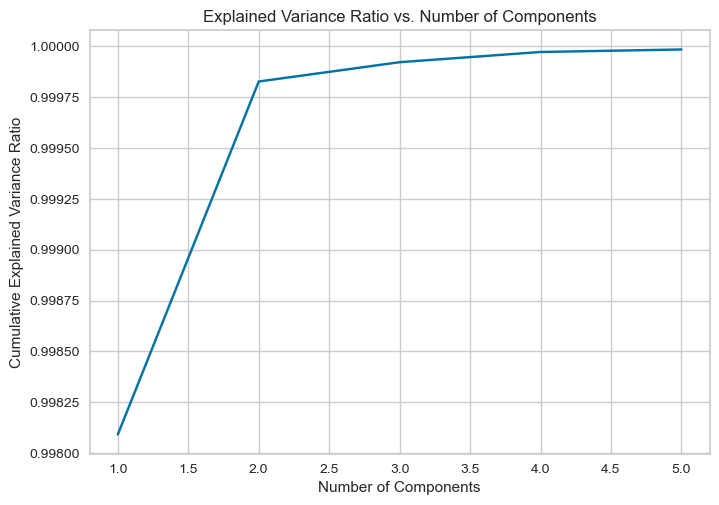

In [212]:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

In [213]:

x_pca=pca.transform(x_scaled)

In [214]:
x_scaled.shape

(178, 13)

In [215]:
x_pca.shape

(178, 5)

C:\Users\Jackson ferrao\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


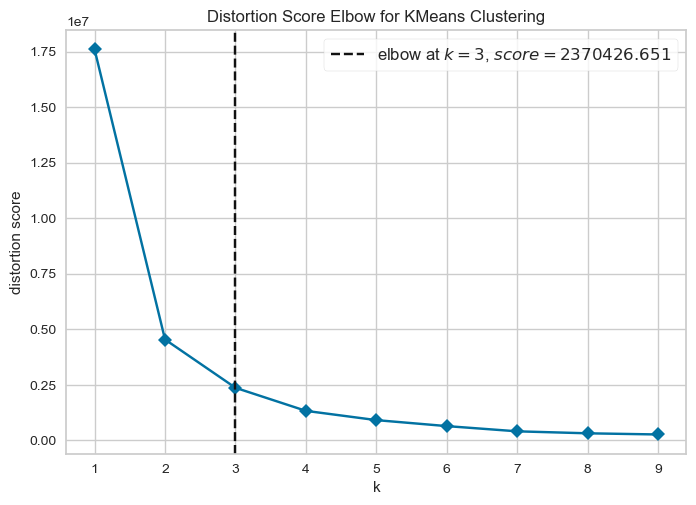

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [216]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(x_pca)
visualizer.show()

C:\Users\Jackson ferrao\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


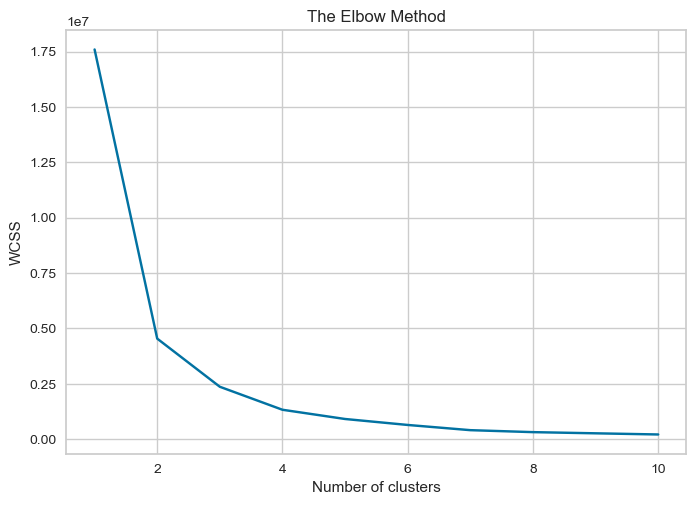

In [217]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [218]:
from sklearn.metrics import silhouette_score
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(x_pca)
    score = silhouette_score(x_pca, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i,score))

For cluster: 2, the silhouette score is: 0.6568864605042608
For cluster: 3, the silhouette score is: 0.5712371867493663
For cluster: 4, the silhouette score is: 0.5612564549841068
For cluster: 5, the silhouette score is: 0.5491818430277355
For cluster: 6, the silhouette score is: 0.5640685356248342
For cluster: 7, the silhouette score is: 0.5624468256197723
For cluster: 8, the silhouette score is: 0.5373902280622554
For cluster: 9, the silhouette score is: 0.5321810626298781


In [219]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_pca)
score = silhouette_score(x_pca, kmeans.labels_)
print(score)





0.6568864605042608


In [220]:
print(y_kmeans)

[0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1
 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1]


In [221]:
pd.DataFrame(y_kmeans).to_csv("Iterators-group5-exercise2.csv")

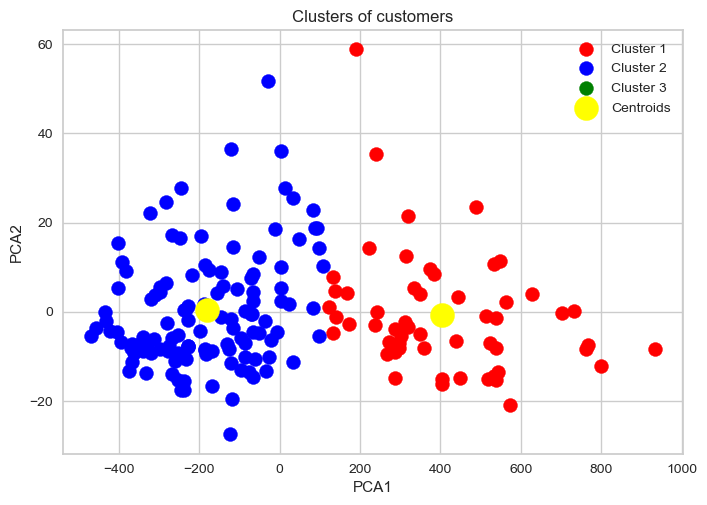

In [222]:
plt.scatter(x_pca[y_kmeans == 0, 0], x_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_pca[y_kmeans == 1, 0], x_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_pca[y_kmeans == 2, 0], x_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()